 ## DATA PREPROCESSING

In [659]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Retail_Transactions_2000.csv')
df2 = df


In [660]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [661]:
df.size

22000

In [662]:
df.shape

(2000, 11)

In [663]:
df.columns

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')

In [664]:
df.dtypes


TransactionID      object
CustomerID         object
Gender             object
Age                 int64
City               object
ProductCategory    object
Quantity            int64
Price               int64
PurchaseDate       object
PaymentMode        object
TotalAmount         int64
dtype: object

In [665]:
df.isna().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [666]:
df[df.duplicated()]

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount


In [667]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [668]:
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [669]:
df = df.dropna(subset=['TransactionID', 'ProductCategory'])

In [670]:
df = df.drop_duplicates(subset=['TransactionID'], keep='first')

In [671]:
df['Gender'] = df['Gender'].str.lower().map({
    'm': 'Male', 'male': 'Male',
    'f': 'Female', 'female': 'Female'
})

df['Gender'] = df['Gender'].fillna('Others')

In [672]:
df['Quantity'] = df['Quantity'].abs()
df['Price'] = df['Price'].abs()


In [673]:
df['PurchaseDate'][0]

'2023-03-15'

In [674]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

df['Year'] = df['PurchaseDate'].dt.year           
df['MonthName'] = df['PurchaseDate'].dt.month_name() 
df['DayOfWeek'] = df['PurchaseDate'].dt.dayofweek
df['DayName'] = df['PurchaseDate'].dt.day_name()
df['Date'] = df['PurchaseDate'].dt.day
     
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,MonthName,DayOfWeek,DayName,Date
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,March,2,Wednesday,15
1,T00002,C1409,Others,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,January,6,Sunday,22
2,T00003,C5506,Others,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,April,1,Tuesday,18
3,T00004,C5012,Others,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,August,2,Wednesday,9
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,September,5,Saturday,23


In [675]:
bins = [17, 25, 40, 60, 120]
labels = ["18-25", "26-40", "41-60", "60+"]

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [676]:
# from sklearn.preprocessing import LabelEncoder


# label_cols = ['Gender', 'City', 'ProductCategory', 'PaymentMode']
# encoder = LabelEncoder()

# for col in label_cols:
#     df[col] = encoder.fit_transform(df[col])


In [677]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,MonthName,DayOfWeek,DayName,Date,AgeGroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,March,2,Wednesday,15,26-40
1,T00002,C1409,Others,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,January,6,Sunday,22,18-25
2,T00003,C5506,Others,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,April,1,Tuesday,18,41-60
3,T00004,C5012,Others,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,August,2,Wednesday,9,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,September,5,Saturday,23,41-60


In [678]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# num_cols = ['Age', 'Price', 'TotalAmount']

# df[num_cols] = scaler.fit_transform(df[num_cols])


In [679]:
print(df.isnull().sum())  


TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
Year               0
MonthName          0
DayOfWeek          0
DayName            0
Date               0
AgeGroup           0
dtype: int64


In [680]:
df.to_csv("Retail_Cleaned.csv", index=False)

## DATA VISUALIZATION

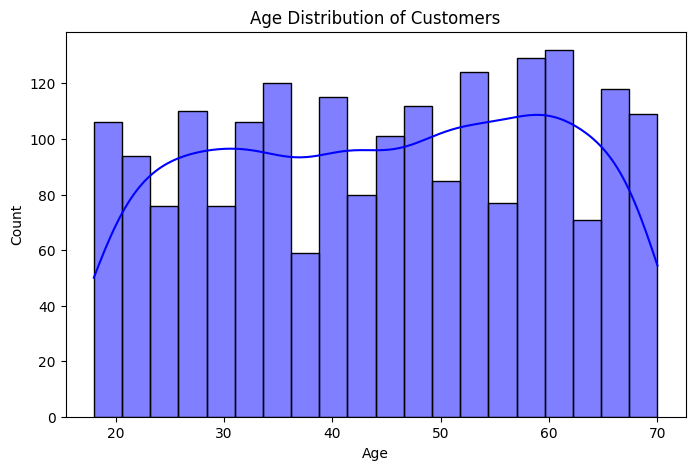

In [681]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

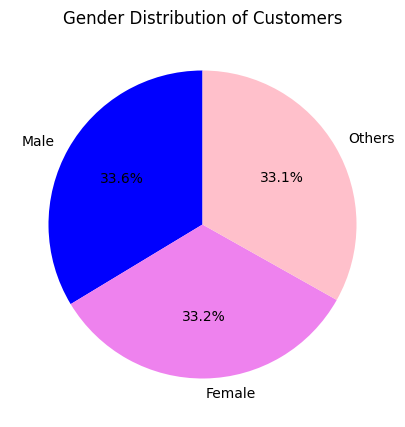

In [682]:
plt.figure(figsize=(6,5))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["blue","violet","pink"])
plt.title("Gender Distribution of Customers")
plt.ylabel("")
plt.show()


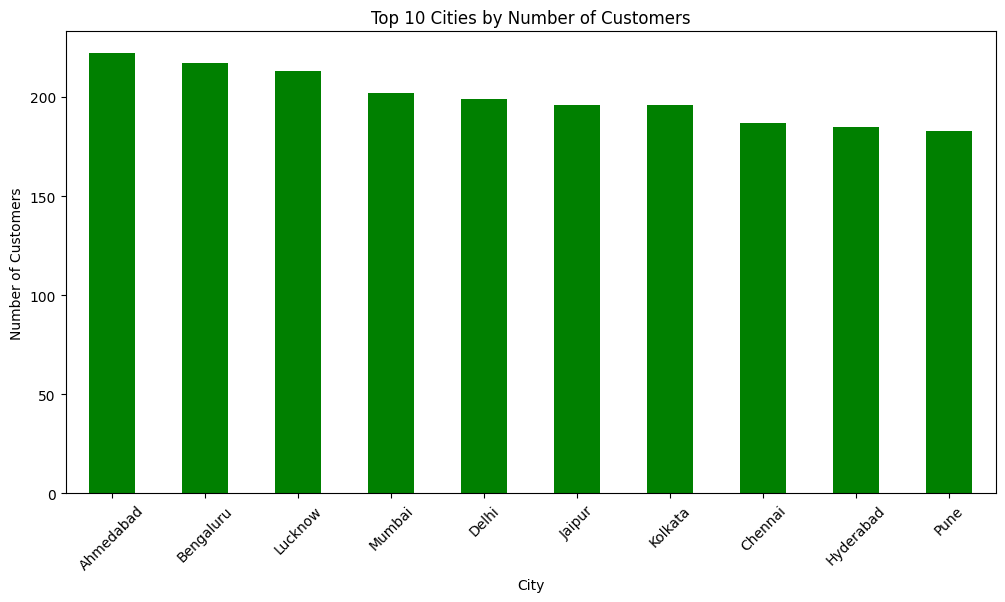

In [683]:
plt.figure(figsize=(12,6))
df['City'].value_counts().head(10).plot(kind='bar', color="green")
plt.title("Top 10 Cities by Number of Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


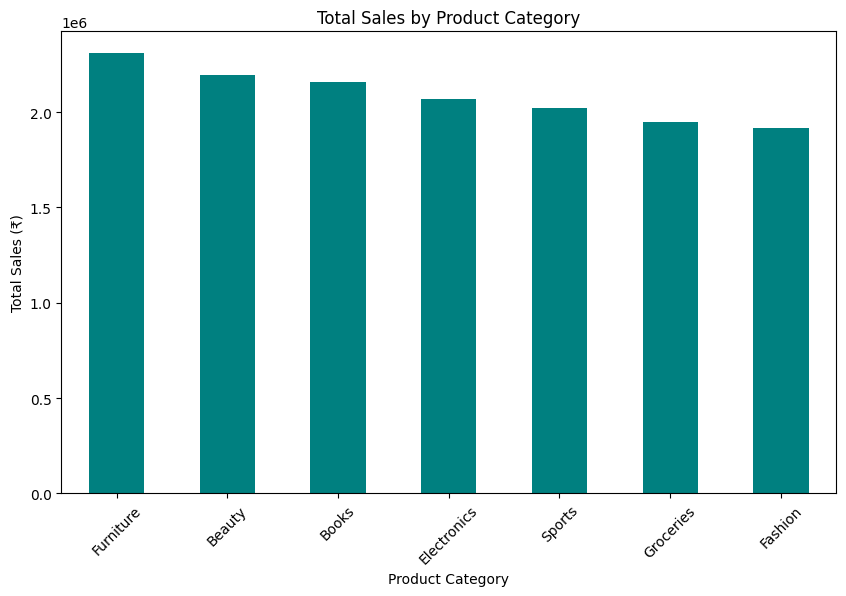

In [684]:
plt.figure(figsize=(10,6))
df.groupby("ProductCategory")["TotalAmount"].sum().sort_values(ascending=False).plot(kind="bar", color="teal")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.show()


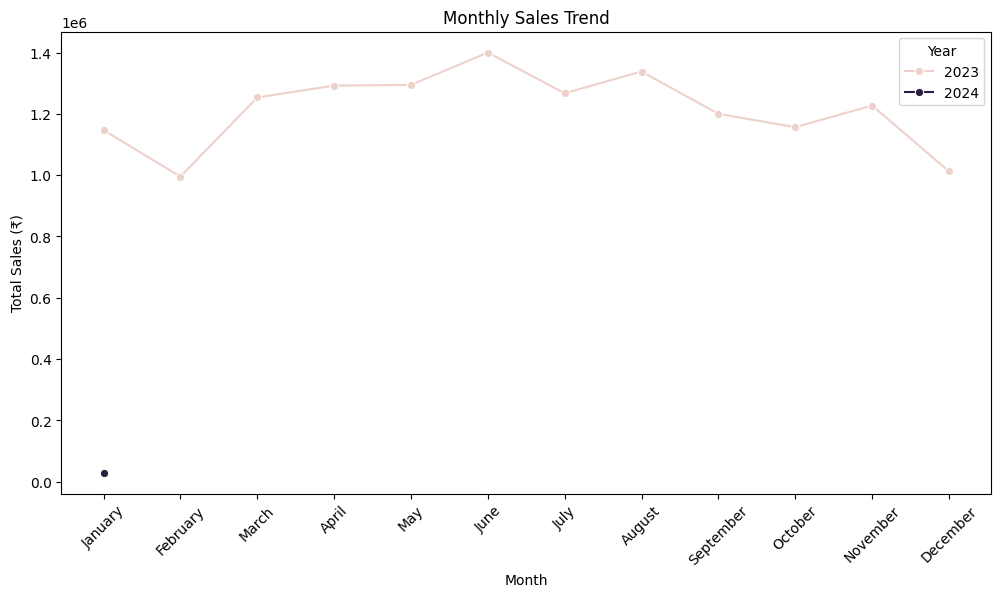

In [685]:
monthly_sales = df.groupby(["Year","MonthName"])["TotalAmount"].sum().reset_index()
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
monthly_sales["MonthName"] = pd.Categorical(monthly_sales["MonthName"], categories=month_order, ordered=True)

monthly_sales = monthly_sales.sort_values(["Year","MonthName"])

plt.figure(figsize=(12,6))
sns.lineplot(x="MonthName", y="TotalAmount", hue="Year", data=monthly_sales, marker="o", color="blue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.show()


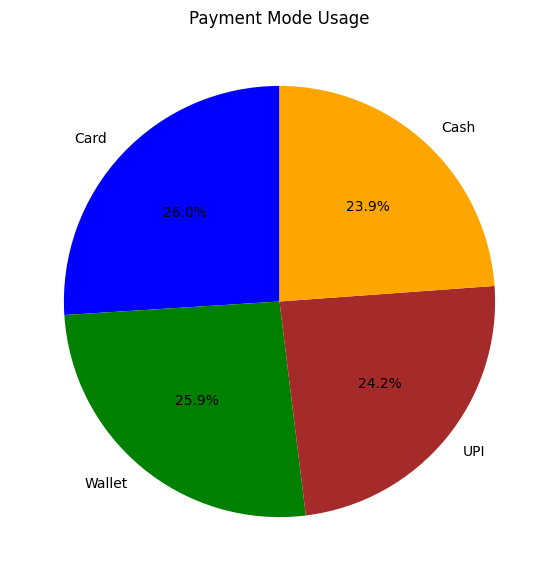

In [686]:
plt.figure(figsize=(7,7))
payment_counts = df['PaymentMode'].value_counts()

plt.pie(payment_counts, 
        labels=payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=["blue","green","brown","orange"])

plt.title("Payment Mode Usage")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14352\2999598451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend = df.groupby("AgeGroup")["TotalAmount"].mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_14352\2999598451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spend.index, y=avg_spend.values, palette="viridis")


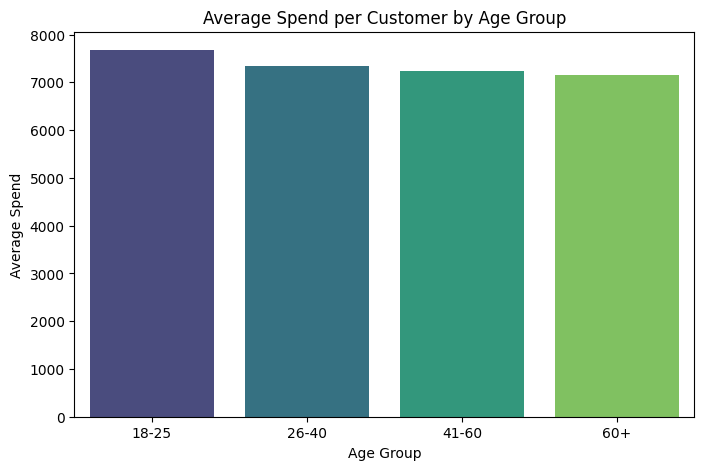

In [687]:
avg_spend = df.groupby("AgeGroup")["TotalAmount"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_spend.index, y=avg_spend.values, palette="viridis")
plt.title("Average Spend per Customer by Age Group")
plt.ylabel("Average Spend")
plt.xlabel("Age Group")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14352\3749546998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue.values, y=city_revenue.index, palette="coolwarm")


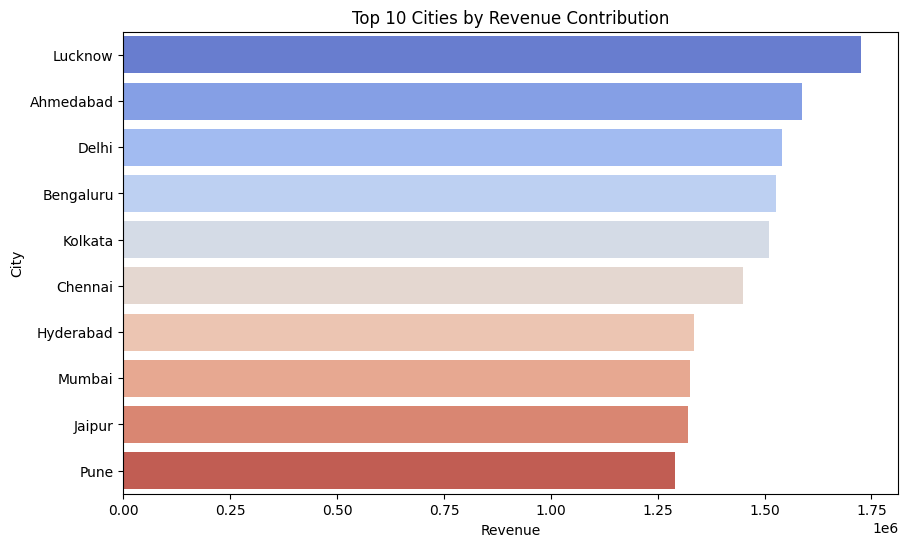

In [688]:
city_revenue = df.groupby("City")["TotalAmount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_revenue.values, y=city_revenue.index, palette="coolwarm")
plt.title("Top 10 Cities by Revenue Contribution")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()


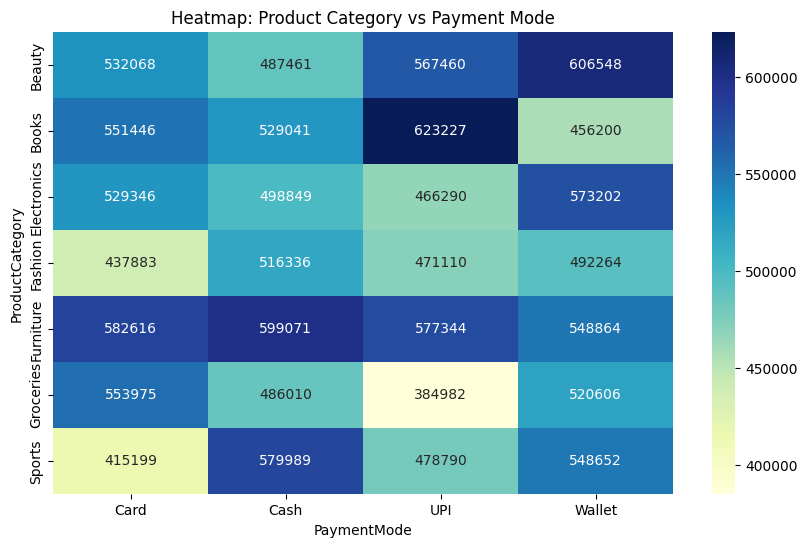

In [689]:
pivot_table = pd.pivot_table(df, 
                             values="TotalAmount", 
                             index="ProductCategory", 
                             columns="PaymentMode", 
                             aggfunc="sum", 
                             fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap: Product Category vs Payment Mode")
plt.show()
